In [1]:
import numpy as np
import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [20]:
dataset = "C:/Users/g/OneDrive/Desktop/AIML/project1/House_Rent_Dataset.csv"
#df = pd.read_csv(io.StringIO(dataset) , sep=r'\s+')  # Replace with actual dataset path
df = pd.read_csv(dataset)
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [21]:
def adjust_size(row):
    if row['Area Type'] == 'Super Area':
        return row['Size'] * 0.75
    elif row['Area Type'] == 'Carpet Area':
        return row['Size'] * 1.3
    else:
        return row['Size']
        
df['final_size'] = df.apply(adjust_size, axis=1)

In [22]:
out1 = df[df['final_size'] > 6000].index
out1
df.drop(out1, inplace=True)
ou2 = df[df['Rent'] > 300000].index
ou2
df.drop(ou2, inplace=True)

In [25]:
rep = { 'Ground': 0, 'Lower': 0,'Upper' : 0}
dffloor = df['Floor'].str.split().str[0].replace(rep)
dffloor = dffloor.astype(int)
df.insert(3,'FL', dffloor)

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
columns_to_encode = ['City', 'Furnishing Status', 'Tenant Preferred','Point of Contact']

In [27]:
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode), index=df.index)

In [28]:
other_cols = df[['BHK', 'FL', 'Bathroom', 'final_size']]

In [29]:
final_df = pd.concat([other_cols, encoded_df], axis=1)
final_df

,BHK,FL,Bathroom,final_size,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,0,2,825.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,600.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,1,1,750.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,1,1,600.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,1,1,1105.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,3,2,1300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4742,3,1,3,1500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4743,3,3,3,2275.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4744,3,23,2,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [30]:
final_df = final_df

In [31]:
X = final_df[['BHK', 'FL', 'Bathroom', 'final_size', 'City_Bangalore', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Furnishing Status_Furnished', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Agent', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner']]  # or X.to_numpy()
y = df['Rent']

In [32]:
RANDOM_STATE = 55
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = RANDOM_STATE)

In [33]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [34]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators = 500, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:33312.05067
[1]	validation_0-rmse:28004.11748
[2]	validation_0-rmse:25027.72217
[3]	validation_0-rmse:23070.26944
[4]	validation_0-rmse:22022.00245
[5]	validation_0-rmse:21750.01343
[6]	validation_0-rmse:21375.60729
[7]	validation_0-rmse:20991.83764
[8]	validation_0-rmse:20902.62112
[9]	validation_0-rmse:20896.32989
[10]	validation_0-rmse:20937.25827
[11]	validation_0-rmse:20745.44740
[12]	validation_0-rmse:20650.49663
[13]	validation_0-rmse:20593.62788
[14]	validation_0-rmse:20610.63151
[15]	validation_0-rmse:20656.14919
[16]	validation_0-rmse:20708.14448
[17]	validation_0-rmse:20699.63638
[18]	validation_0-rmse:20714.74877
[19]	validation_0-rmse:20760.45718
[20]	validation_0-rmse:20669.03555
[21]	validation_0-rmse:20701.82618
[22]	validation_0-rmse:20743.85833
[23]	validation_0-rmse:20784.56663
[24]	validation_0-rmse:20780.82788
[25]	validation_0-rmse:20830.46595
[26]	validation_0-rmse:20913.65708
[27]	validation_0-rmse:20893.50105
[28]	validation_0-rmse:20883.9

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=55, ...)

In [39]:
y_pred = xgb_model.predict(X_test)

In [40]:
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2}")

R-squared Score: 0.6800909638404846


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2]  # Add other parameters as needed
}


In [42]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_xgbr = grid_search.best_estimator_

In [43]:
y_pred_best = best_xgbr.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("--- Tuned Model ---")
print(f"Best Mean Squared Error: {mse_best}")
print(f"Best R-squared: {r2_best}")

--- Tuned Model ---
Best Mean Squared Error: 380193600.0
Best R-squared: 0.7714962363243103


In [48]:
# 9. (Optional) Save the trained model
xgb_model.save_model("xgboost_model.json")  # or best_xgbr


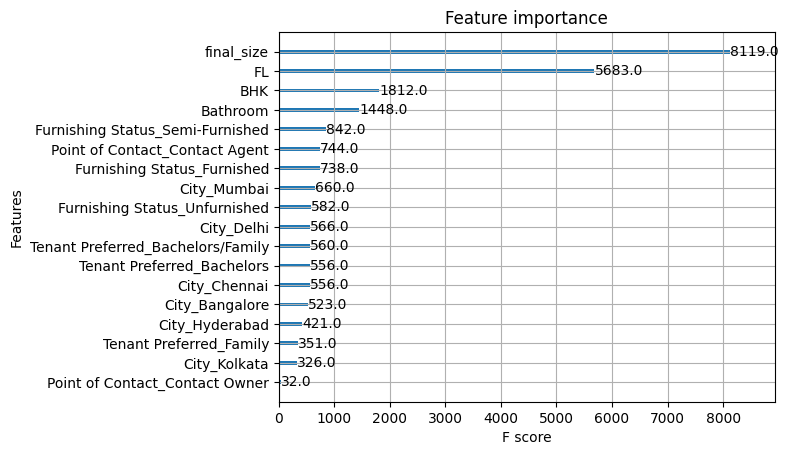

In [50]:
# 8. (Optional) Feature Importance
from xgboost import plot_importance
plot_importance(xgb_model)  # or best_xgbr if you tuned
plt.show()